##. Read the data as an appropriate Time Series data and plot the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Sparkling.csv")
df=pd.read_csv(path,parse_dates=True)

In [ ]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


* There are 187 rows and 2 columns in the dataset.
* The data is from 1-Jan-1980 to 1-July-1995, which is a sale of Sparkling wine for 15 years of each month.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


* YearMonth column is in object type data type we need to change it into Datetime data type.
* There are no null values in the data set.
* Created a date range starting with 1-Jan-1980 , using frequency as Month and periods as length of the data set.
* Created a new column Time stamp by using the date range created and set it as the index for the data set.
* Dropped column YearMonth from the dataset.


In [ ]:
date=pd.date_range(start="1/1/1980",freq="MS",periods=len(df))
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [ ]:
df["Time_stamp"]=pd.DataFrame(date)
df.set_index(keys=["Time_stamp"],inplace=True)
df.drop(["YearMonth"],inplace=True,axis=1)

In [ ]:
df.head()

,Sparkling
Time_stamp,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [ ]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [ ]:
df.shape

(187, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
from pylab import rcParams

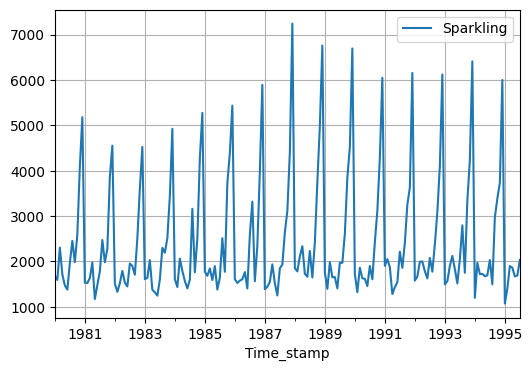

In [ ]:
rcParams["figure.figsize"]=6,4
df.plot(grid=True);

# #Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [ ]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


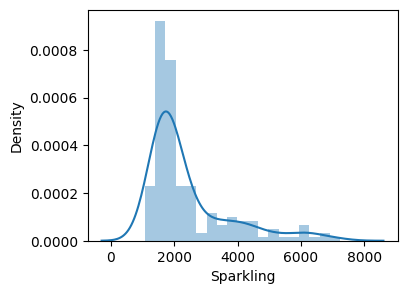

In [ ]:
plt.figure(figsize=(4,3))
sns.distplot(df["Sparkling"]);

Distribution of sparkling wine is right skewed.

In [ ]:
monthly_sales_data=pd.pivot_table(df,values="Sparkling",columns=df.index.year,index=df.index.month)
monthly_sales_data

Time_stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_stamp,,,,,,,,,,,,,,,,
1,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
2,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
3,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
4,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
5,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
6,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
7,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
8,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
9,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


In [ ]:
monthly_sales_data1=pd.pivot_table(df,values="Sparkling",columns=df.index.month,index=df.index.year)
monthly_sales_data1

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


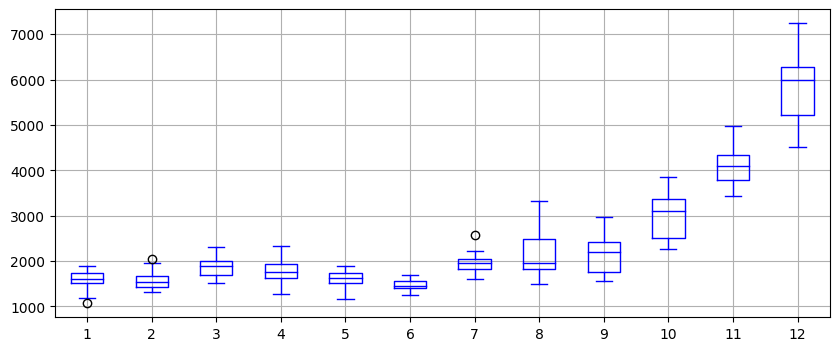

In [ ]:
monthly_sales_data1.plot(kind="box",figsize=(10,4),color="Blue")
plt.grid()

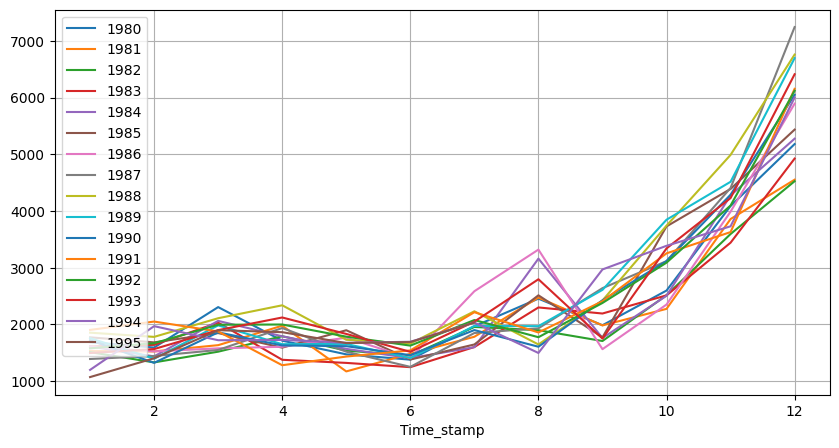

In [ ]:
rcParams["figure.figsize"]=10,5
monthly_sales_data.plot(grid=True);
plt.legend(loc="best")

* The sales of Sparkling wine have been increasing at the end of the year.
* December month has most sales compared to all the other months.

In [ ]:
yearly_sales_data=pd.pivot_table(df,values="Sparkling",columns=df.index.month,index=df.index.year)
yearly_sales_data

Time_stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


In [ ]:
yearly_sales_data1=pd.pivot_table(df,values="Sparkling",index=df.index.month,columns=df.index.year)
yearly_sales_data1

Time_stamp,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Time_stamp,,,,,,,,,,,,,,,,
1,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
2,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
3,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
4,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
5,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
6,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
7,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
8,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
9,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


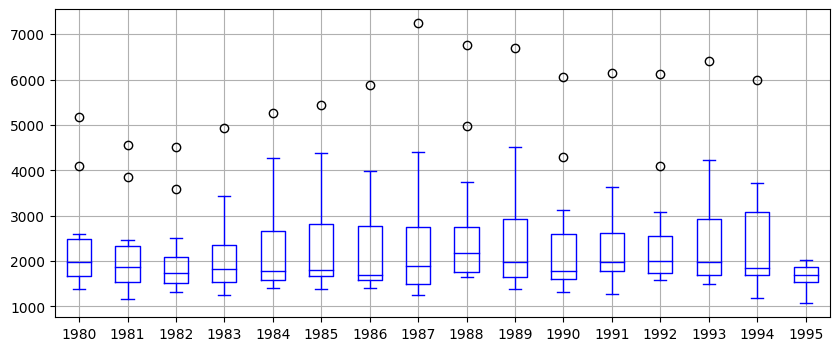

In [ ]:
yearly_sales_data1.plot(kind="box",figsize=(10,4),color="Blue")
plt.grid()

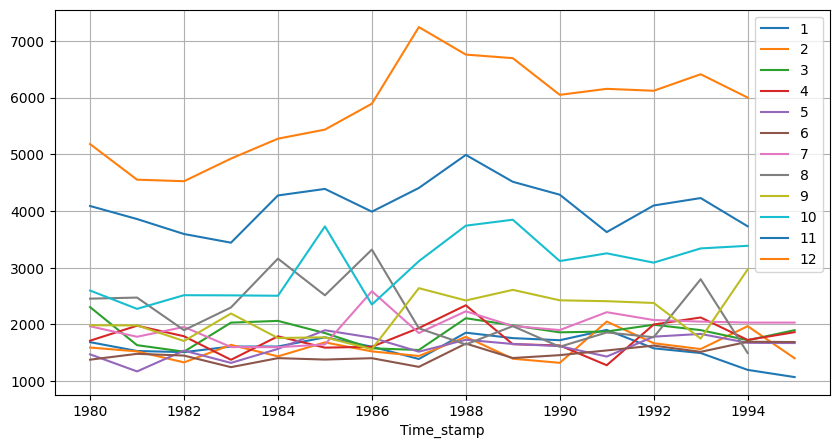

In [ ]:
rcParams["figure.figsize"]=10,5
yearly_sales_data.plot(grid=True);
plt.legend(loc="best")

* There is decrease in sales from 1980 to 1995 in the months of January, February and March.
* Year 1987 has most sales in the month of December followed by year 1988 and in month November.

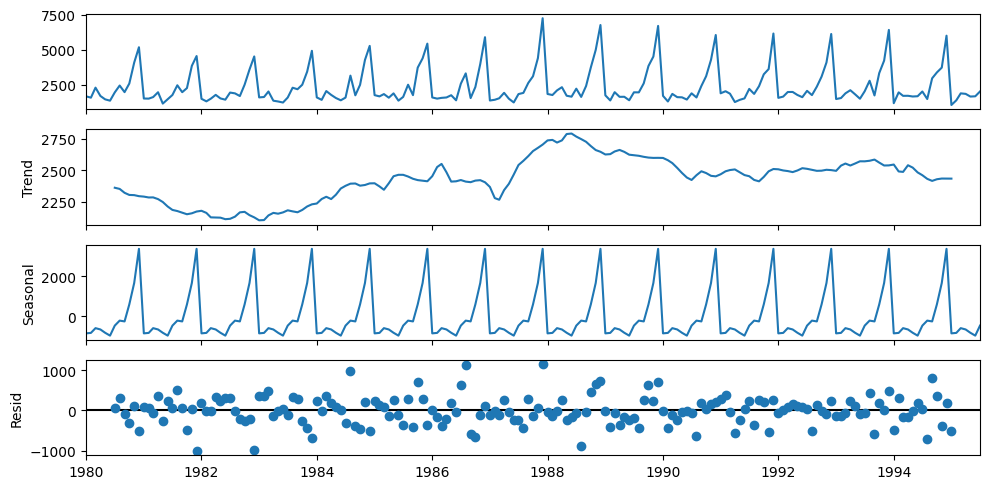

In [ ]:
df_add=seasonal_decompose(df,model="additive")
df_add.plot();

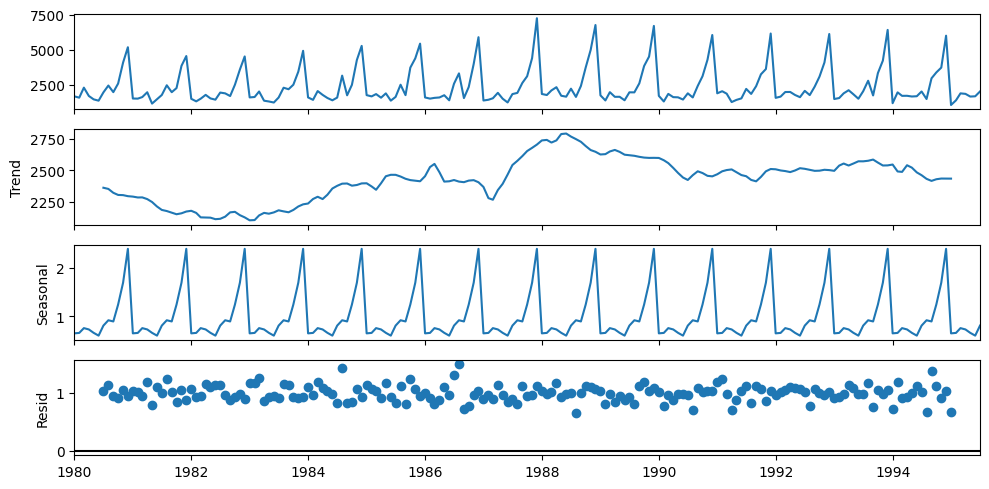

In [ ]:
df_mul=seasonal_decompose(df,model="multiplicative")
df_mul.plot();

#Split the data into training and test. The test data should start in 1991.
* Data is split into training and test set.
* Training date is from 1-Jan-1980 to 1-Jan-1990.
* Test set is from 1-Jan-1991 to 1-July-1995.


In [ ]:
Train=df[df.index.year<1991]
Test=df[df.index.year>=1991]

In [ ]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [ ]:
print("First five rows of the Training set:\n")
display(Train.head())
print("\nLast five rows of the Training set:\n")
display(Train.tail())

First five rows of the Training set:



,Sparkling
Time_stamp,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471



Last five rows of the Training set:



,Sparkling
Time_stamp,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [ ]:
print("First five rows of the Test set:\n")
display(Test.head())
print("\nLast five rows of the Test set:\n")
display(Test.tail())

First five rows of the Test set:



,Sparkling
Time_stamp,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432



Last five rows of the Test set:



,Sparkling
Time_stamp,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


#Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#Simple Exponential Smoothing

* Made a copy of Train and Test for Simple Exponential Smoothing as SES_train and SES_test.
* Using Simple Exponential Smoothing with initialization method as estimated built a model with SES_train.
* Built model is fitted with optimized as True.


In [ ]:
SES_train=Train.copy()
SES_test=Test.copy()

In [ ]:
SES_model=SimpleExpSmoothing(SES_train,initialization_method="Estimated")

In [ ]:
SES_model_autofit=SES_model.fit(optimized=True)
SES_model_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_predict=SES_model_autofit.forecast(steps=len(SES_test))
SES_predict.head(10)

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
Freq: MS, dtype: float64

In [ ]:
SES_predict.tail(10)

1994-10-01    2804.662714
1994-11-01    2804.662714
1994-12-01    2804.662714
1995-01-01    2804.662714
1995-02-01    2804.662714
1995-03-01    2804.662714
1995-04-01    2804.662714
1995-05-01    2804.662714
1995-06-01    2804.662714
1995-07-01    2804.662714
Freq: MS, dtype: float64

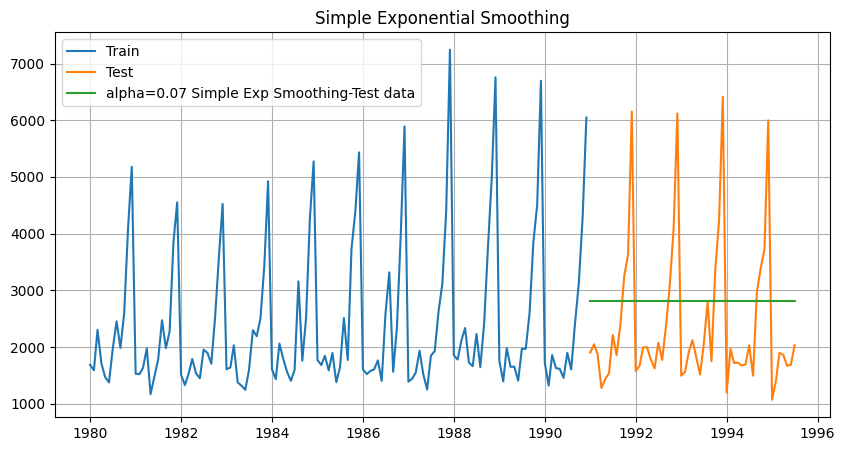

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(SES_predict,label="alpha=0.07 Simple Exp Smoothing-Test data")
plt.grid()
plt.title("Simple Exponential Smoothing")
plt.legend(loc="best")

In [ ]:
rmse_SES=mean_squared_error(SES_test.values,SES_predict.values,squared=False)
rmse_SES

1338.0046232563645

In [ ]:
Result_DF=pd.DataFrame({"Test RMSE":[rmse_SES]},index=["Simple Exponential Smoothing"])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623


#Double Exponential Smoothing
* Made a copy of Train and Test for Double Exponential Smoothing as DES_train and DES_test.
* Using Double Exponential Smoothing with initialization method as estimated built a model with DES_train.
*Built model is fitted with optimized as True.


In [ ]:
DES_train=Train.copy()
DES_test=Test.copy()

In [ ]:
DES_model=Holt(DES_train,initialization_method="Estimated")
DES_model

In [ ]:
DES_model_autofit=DES_model.fit(optimized=True)
DES_model_autofit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
DES_predict=DES_model_autofit.forecast(steps=len(DES_test))
DES_predict.head(10)

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
Freq: MS, dtype: float64

In [ ]:
DES_predict.tail(10)

1994-10-01    8743.982188
1994-11-01    8818.254392
1994-12-01    8892.526595
1995-01-01    8966.798799
1995-02-01    9041.071003
1995-03-01    9115.343206
1995-04-01    9189.615410
1995-05-01    9263.887613
1995-06-01    9338.159817
1995-07-01    9412.432021
Freq: MS, dtype: float64

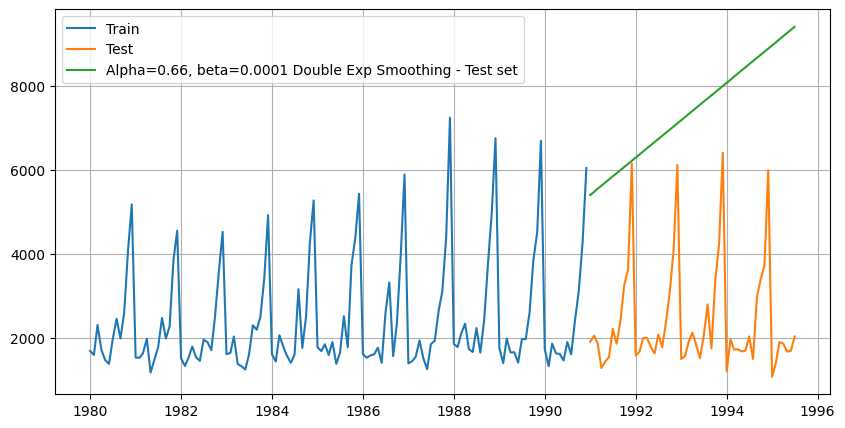

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(DES_predict,label="Alpha=0.66, beta=0.0001 Double Exp Smoothing - Test set")
plt.grid()
plt.legend(loc="best")

blue series is of Training set and orange one is of test set and green line is the predicted values using double exponential smoothing method with alpha and beta values as 0.66 and 0.0001

In [ ]:
rmse_DES=mean_squared_error(DES_test.values,DES_predict.values,squared=False)
rmse_DES

5291.879833226911

In [ ]:
DES_DF=pd.DataFrame({"Test RMSE":[rmse_DES]},index=["alpha=0.66, beta=0.0001 Holt method"])
Result_DF=pd.concat([Result_DF,DES_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833


#Triple Exponential Smoothing
* Made a copy of Train and Test for Triple Exponential Smoothing as TES_train and TES_test.
* Using Triple Exponential Smoothing with initialization method as estimated built a model with DES_train along with Trend as additive and seasonal as additive and multiplicative.
* Two models were built with trend as additive and seasonality as additive and trend as additive and seasonality as multiplicative.
* Built model is fitted with optimized as True.


In [ ]:
TES_train=Train.copy()
TES_test=Test.copy()

In [ ]:
TES_model=ExponentialSmoothing(TES_train,trend="additive",seasonal="additive",initialization_method="Estimated")

In [ ]:
TES_model_autofit=TES_model.fit(optimized=True)
TES_model_autofit.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
TES_predict=TES_model_autofit.forecast(steps=len(TES_test))
TES_predict.head(10)

1991-01-01    1490.574426
1991-02-01    1204.714325
1991-03-01    1688.941106
1991-04-01    1551.450810
1991-05-01    1461.440427
1991-06-01    1278.907163
1991-07-01    1805.164022
1991-08-01    1679.251392
1991-09-01    2315.687649
1991-10-01    3225.308906
Freq: MS, dtype: float64

In [ ]:
TES_predict.tail(10)

1994-10-01    3203.475363
1994-11-01    4277.818818
1994-12-01    6389.327789
1995-01-01    1461.463036
1995-02-01    1175.602934
1995-03-01    1659.829715
1995-04-01    1522.339419
1995-05-01    1432.329037
1995-06-01    1249.795772
1995-07-01    1776.052632
Freq: MS, dtype: float64

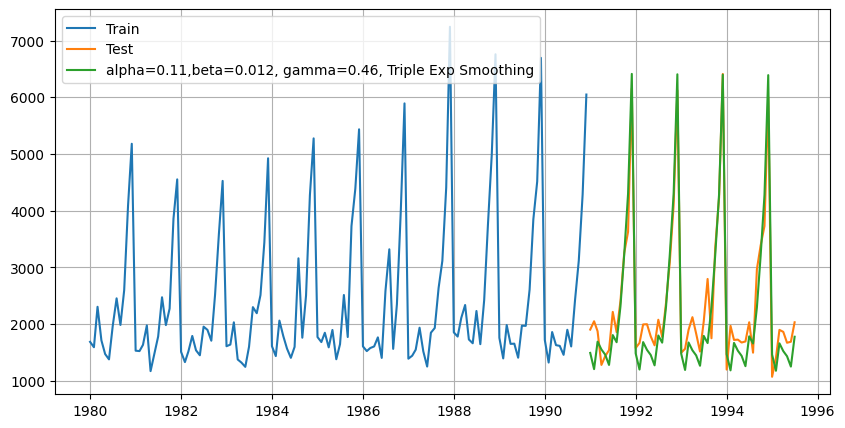

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(TES_predict,label="alpha=0.11,beta=0.012, gamma=0.46, Triple Exp Smoothing")
plt.grid()
plt.legend(loc="best")

* Blue series is Training set, orange is of test and green is of Triple exponential smoothing with additive seasonality.
* We can see that the predict values are following the trend and seasonality of test set.


In [ ]:
rmse_TES=mean_squared_error(TES_test.values,TES_predict.values,squared=False)
rmse_TES

378.6262408893861

In [ ]:
TES_DF=pd.DataFrame({"Test RMSE":[rmse_TES]},index=["alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing"])
Result_DF=pd.concat([Result_DF,TES_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241


In [ ]:
TES_model2=ExponentialSmoothing(TES_train,trend="additive",seasonal="multiplicative",initialization_method="Estimated")

In [ ]:
TES_model2_autofit=TES_model2.fit(optimized=True)
TES_model2_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
TES_predict_mul=TES_model2_autofit.forecast(steps=len(TES_test))

In [ ]:
TES_predict_mul.head(10)

1991-01-01    1587.685845
1991-02-01    1356.590237
1991-03-01    1763.121866
1991-04-01    1656.379813
1991-05-01    1542.186697
1991-06-01    1355.276292
1991-07-01    1854.460265
1991-08-01    1820.822870
1991-09-01    2277.203230
1991-10-01    3122.460625
Freq: MS, dtype: float64

In [ ]:
TES_predict_mul.tail(10)

1994-10-01    2825.843772
1994-11-01    3735.864098
1994-12-01    5328.585023
1995-01-01    1391.255391
1995-02-01    1188.317490
1995-03-01    1543.855924
1995-04-01    1449.853475
1995-05-01    1349.397780
1995-06-01    1185.410670
1995-07-01    1621.420148
Freq: MS, dtype: float64

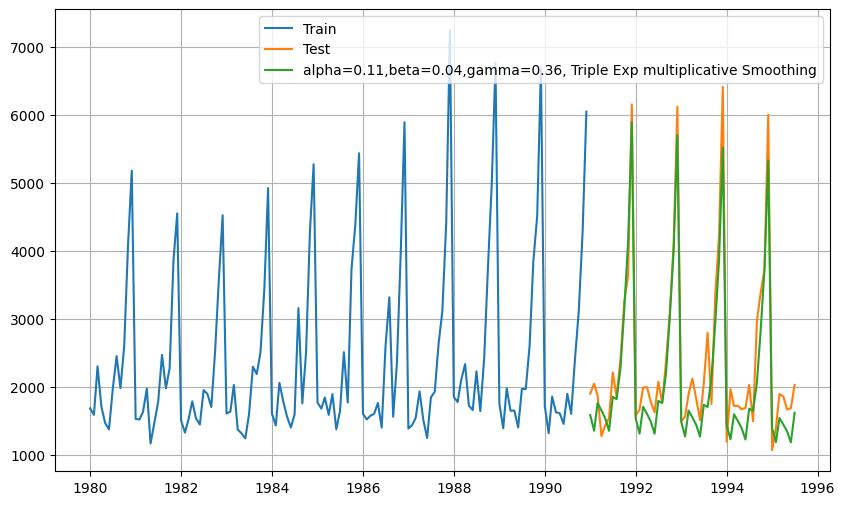

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(TES_predict_mul,label="alpha=0.11,beta=0.04,gamma=0.36, Triple Exp multiplicative Smoothing")
plt.grid()
plt.legend(loc="best")

* Blue series is Training set, orange is of test and green is of Triple exponential smoothing with multiplicative seasonality.
* We can see that the predict values are following the trend and seasonality of test set


In [ ]:
rmse_TES_mul=mean_squared_error(TES_test.values,TES_predict_mul.values,squared=False)
rmse_TES_mul

403.7062277856435

In [ ]:
TES_DF_mul=pd.DataFrame({"Test RMSE":[rmse_TES_mul]},index=["alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing"])
Result_DF=pd.concat([Result_DF,TES_DF_mul])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228


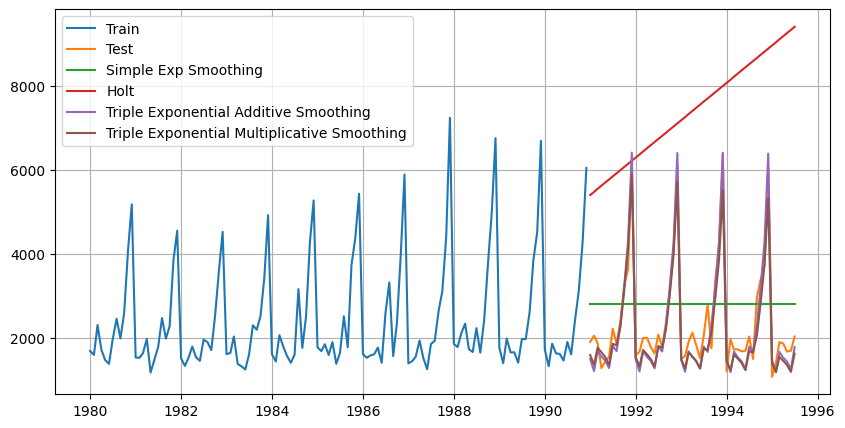

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(SES_predict,label="Simple Exp Smoothing")
plt.plot(DES_predict,label="Holt")
plt.plot(TES_predict,label="Triple Exponential Additive Smoothing")
plt.plot(TES_predict_mul,label="Triple Exponential Multiplicative Smoothing")
plt.grid()
plt.legend(loc="best")

#Linear Regression
* Made a copy of Train and Test sets as LR_train and LR_test for performing Linear Regression.
* Created Time columns from the length of train and test set for performing regression.
* Model it for the Train data and predicted on Test data

In [ ]:
LR_train=Train.copy()
LR_test=Test.copy()

In [ ]:
lr=LinearRegression()

In [ ]:
Train.shape

(132, 1)

In [ ]:
Train_time=[i+1 for i in range(len(LR_train))]
Test_time=[i+133 for i in range(len(LR_test))]

In [ ]:
LR_train["Time"]=Train_time
LR_test["Time"]=Test_time

In [ ]:
LR_train.head()

,Sparkling,Time
Time_stamp,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


In [ ]:
LR_model=lr.fit(LR_train[["Time"]],LR_train["Sparkling"])
LR_model

LinearRegression()

In [ ]:
LR_test_predict=LR_model.predict(LR_test[["Time"]])
LR_test["RegOntime"]=LR_test_predict

In [ ]:
LR_test.head()

,Sparkling,Time,RegOntime
Time_stamp,,,
1991-01-01,1902,133,2791.652093
1991-02-01,2049,134,2797.484752
1991-03-01,1874,135,2803.317410
1991-04-01,1279,136,2809.150069
1991-05-01,1432,137,2814.982727


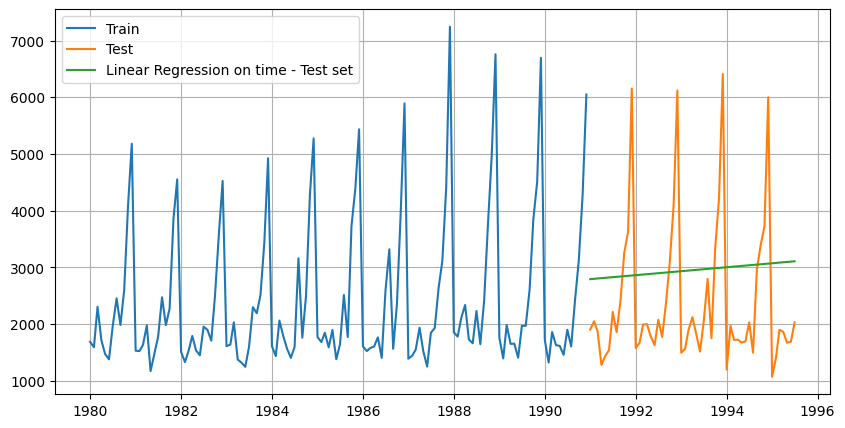

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(LR_test["RegOntime"],label="Linear Regression on time - Test set")
plt.grid()
plt.legend(loc="best")

* Blue series is of Train data, orange is of test data and green line is the predicted values of Linear Regression model and it does not follow the pattern of series in the test set.


In [ ]:
rmse_LR=mean_squared_error(LR_test["RegOntime"],LR_test["Sparkling"],squared=False)
rmse_LR

1389.135174897992

In [ ]:
LR_DF=pd.DataFrame({"Test RMSE":[rmse_LR]},index=["Linear Regression"])
Result_DF=pd.concat([Result_DF,LR_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175


#Naive Approach
* Naïve approach is that it predict the values on the basis of the last value of training data and predict it as the same value and forecast it across the test data.
* Made a copy of Train and Test set for Naïve approach as Naïve_train and Naïve_test.
* Created an array of numbers from the last value of Training set and predicted the same value across the test set.


In [ ]:
Naive_train=Train.copy()
Naive_test=Test.copy()

In [ ]:
Naive_train.tail()

,Sparkling
Time_stamp,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [ ]:
Naive_test["Naive"]=np.asarray(Naive_train["Sparkling"])[len(np.asarray(Naive_train["Sparkling"]))-1]
Naive_test.head()

,Sparkling,Naive
Time_stamp,,
1991-01-01,1902,6047
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047


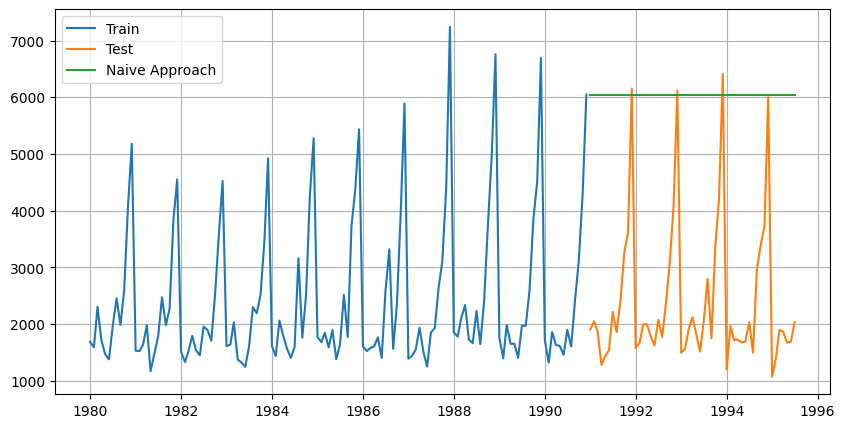

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Naive_test["Naive"],label="Naive Approach")
plt.grid()
plt.legend(loc="best")

* The predicted values in the test set are the last value from the training set and it is forecasted as the same value across the test set.

In [ ]:
rmse_Naive=mean_squared_error(Naive_test["Sparkling"],Naive_test["Naive"],squared=False)
rmse_Naive

3864.2793518443914

In [ ]:
Naive_DF=pd.DataFrame({"Test RMSE":[rmse_Naive]},index=["Naive forecast"])
Result_DF=pd.concat([Result_DF,Naive_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175
Naive forecast,3864.279352


#Simple Average
* Copy of Train and test are taken for model building as Simple_train and Simple_test.
* Simple Average model is that it takes the average or mean of all the values in the train set and forecasts the same value in the test set.


In [ ]:
Simple_train=Train.copy()
Simple_test=Test.copy()

In [ ]:
Simple_test["Mean forecast"]=Simple_train["Sparkling"].mean()
Simple_test.head()

,Sparkling,Mean forecast
Time_stamp,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


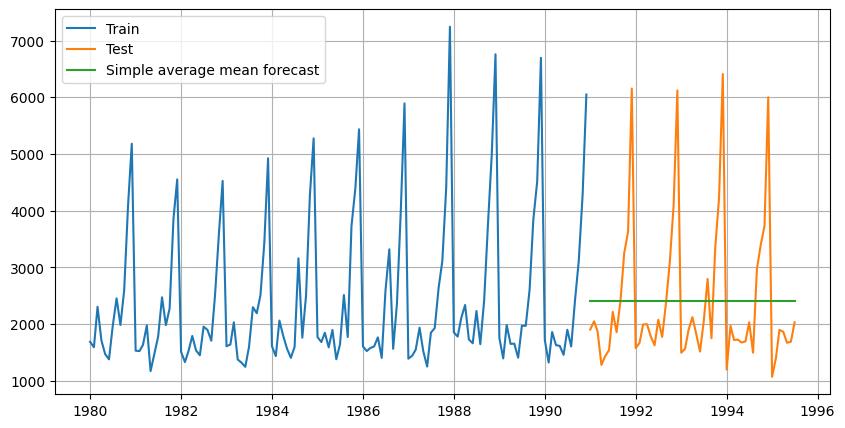

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Simple_test["Mean forecast"],label="Simple average mean forecast")
plt.grid()
plt.legend(loc="best")

* The forecasted values are in a straight line and are not any closer to the test set series.

In [ ]:
rmse_Simple=mean_squared_error(Simple_test["Mean forecast"],Simple_test["Sparkling"],squared=False)
rmse_Simple

1275.0818036965309

In [ ]:
Simple_DF=pd.DataFrame({"Test RMSE":[rmse_Simple]},index=["Simple Average mean forecast"])
Result_DF=pd.concat([Result_DF,Simple_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175
Naive forecast,3864.279352
Simple Average mean forecast,1275.081804


#Moving Average

In [ ]:
Moving_average=df.copy()

In [ ]:
Moving_average["Trailing_2"]=Moving_average["Sparkling"].rolling(2).mean()
Moving_average["Trailing_4"]=Moving_average["Sparkling"].rolling(4).mean()
Moving_average["Trailing_6"]=Moving_average["Sparkling"].rolling(6).mean()
Moving_average["Trailing_9"]=Moving_average["Sparkling"].rolling(9).mean()

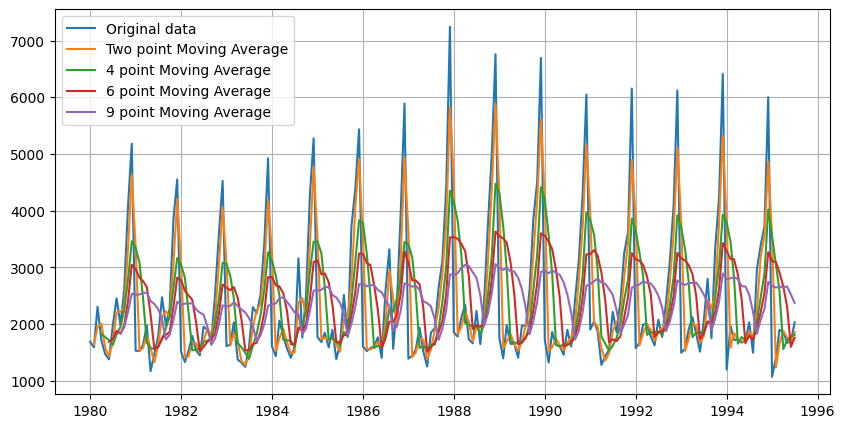

In [ ]:
plt.plot(Moving_average["Sparkling"],label="Original data")
plt.plot(Moving_average["Trailing_2"],label="Two point Moving Average")
plt.plot(Moving_average["Trailing_4"],label="4 point Moving Average")
plt.plot(Moving_average["Trailing_6"],label="6 point Moving Average")
plt.plot(Moving_average["Trailing_9"],label="9 point Moving Average")
plt.grid()
plt.legend(loc="best")

 2 point moving average is very close to the series in the test set, which is of green colour in the plot.

In [ ]:
Moving_train=Moving_average[Moving_average.index.year<1991]
Moving_test=Moving_average[Moving_average.index.year>=1991]

In [ ]:
Moving_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_stamp,,,,,
1991-01-01,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111


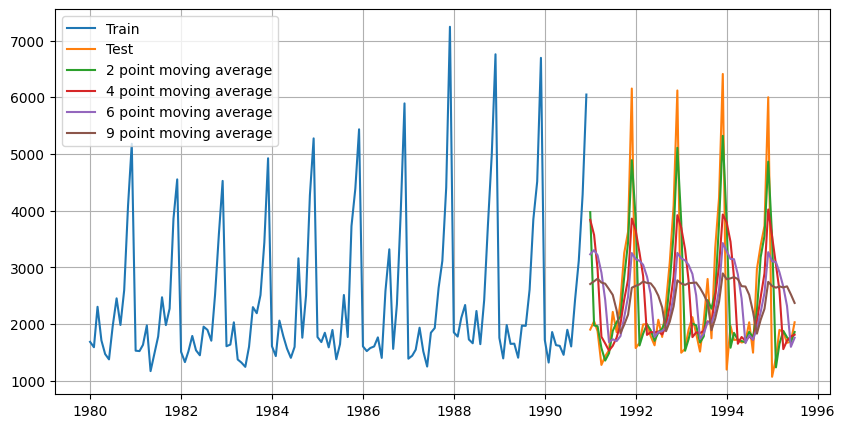

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(Moving_test["Trailing_2"],label="2 point moving average")
plt.plot(Moving_test["Trailing_4"],label="4 point moving average")
plt.plot(Moving_test["Trailing_6"],label="6 point moving average")
plt.plot(Moving_test["Trailing_9"],label="9 point moving average")
plt.grid()
plt.legend(loc="best")

In [ ]:
rmse_2point=mean_squared_error(Moving_test["Trailing_2"],Moving_test["Sparkling"],squared=False)
rmse_2point

813.4006839972983

In [ ]:
rmse_4point=mean_squared_error(Moving_test["Trailing_4"],Moving_test["Sparkling"],squared=False)
rmse_4point

1156.589694081071

In [ ]:
rmse_6point=mean_squared_error(Moving_test["Trailing_6"],Moving_test["Sparkling"],squared=False)
rmse_6point

1283.9274280129855

In [ ]:
rmse_9point=mean_squared_error(Moving_test["Trailing_9"],Moving_test["Sparkling"],squared=False)
rmse_9point

1346.2783154241804

In [ ]:
Moving_DF=pd.DataFrame({"Test RMSE":[rmse_2point,rmse_4point,rmse_6point,rmse_9point]},
                       index=["2 Point Moving Average","4 Point Moving Average","6 Point Moving Average","9 Point Moving Average"])
Result_DF=pd.concat([Result_DF,Moving_DF])
Result_DF


,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175
Naive forecast,3864.279352
Simple Average mean forecast,1275.081804
2 Point Moving Average,813.400684
4 Point Moving Average,1156.589694
6 Point Moving Average,1283.927428


#Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#Note: Stationarity should be checked at alpha = 0.05.


# Test for Stationarity using ADFuller test

# Null hypothesis:Time series is non stationary
#Alternate hypothesis : Time Series is Stationary
#If P value is less than 0.05 then, reject null hypothesis.
#If p value greater than 0.05 then we failed to reject null hypothesis .i.e., Time series is non stationary

* Stationarity means the variance and auto correlation of time series are constant over time.
* We can check for the stationary of the data using Dickey fuller test.
Augmented Dickey fuller (adfuller) is imported from statsmodels.tsa.stattools.
* ARIMA and SARIMA models can only be performed when the time series is stationary


In [ ]:
def test_stationarity(timeseries):
  print("Dickey Fuller test:")
  dftest=adfuller(timeseries,autolag="AIC")
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput,'\n')

In [ ]:
test_stationarity(df["Sparkling"])

Dickey Fuller test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



* The alpha/p value of time series in greater than 0.05.
* So, we failed to reject null hypothesis that means the time series is not stationary.
* For further proceedings, we need to make time series stationary.
* In order to make the time series we need to use differencing method which is if d=1, then the difference of current point and previous point is taken and so on, until time series becomes stationary.
* Now let’s check for stationary after performing differencing with d=1


In [ ]:
test_stationarity(df["Sparkling"].diff().dropna())

Dickey Fuller test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



* The value of alpha/p value is less than 0.05, thus we can reject null hypothesis.
* Now the time series is stationary.


In [ ]:
test_stationarity(Train["Sparkling"])

Dickey Fuller test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [ ]:
test_stationarity(Train["Sparkling"].diff().dropna())

Dickey Fuller test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



#Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

* We have to take d value as 1 to make the time series stationary.
* As for p and q values we can range of values between 0 and 3 and using for loop we will get different parameters for building a model.


In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


* These are parameters generated by using for loop for building ARIMA model.
* Created a dataframe for storing AIC values for modelling parameters, the parameters having having lowest values are taken for building ARIMA model.
* ARIMA model is built and Train values are fit into it and using for loop all the p, q and d values are passed.
* All the AIC values obtained from the model are appended into a data frame, so that we can get best model parameters from all the values and are sorted in ascending order.


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(Train["Sparkling"].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231352784
ARIMA(1, 1, 0) - AIC:2266.6085393190097


<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC

ARIMA(1, 1, 1) - AIC:2235.755094674255
ARIMA(1, 1, 2) - AIC:2234.5272004518056


<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626238336


<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2213.5092125741553


<ipython-input-320-de0f88ec03b5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509213
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


* From the above table we can see that AIC value of p=2, d=1 and q=2 gives us the least AIC value.
* Now using the above parameters let’s build ARIMA model and fit it into train set along with p, q, and d values.


In [ ]:
auto_ARIMA=ARIMA(Train["Sparkling"],order=(2,1,2),freq="MS")
result_auto_ARIMA=auto_ARIMA.fit()
print(result_auto_ARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 03 Jun 2023   AIC                           2213.509
Time:                        06:15:20   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [ ]:
auto_ARIMA_predict=result_auto_ARIMA.forecast(steps=len(Test))
auto_ARIMA_predict.head(10)

1991-01-01    4252.351783
1991-02-01    2863.094858
1991-03-01    2043.976243
1991-04-01    1746.207662
1991-05-01    1813.631540
1991-06-01    2068.639256
1991-07-01    2365.527159
1991-08-01    2612.451803
1991-09-01    2770.395896
1991-10-01    2839.532054
Freq: MS, Name: predicted_mean, dtype: float64

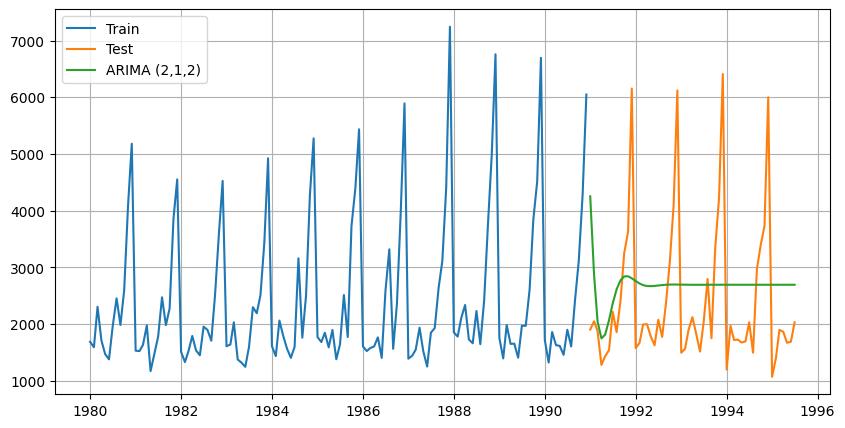

In [ ]:
plt.plot(Train,label="Train")
plt.plot(Test,label="Test")
plt.plot(auto_ARIMA_predict,label="ARIMA (2,1,2)")
plt.grid()
plt.legend(loc="best")

We can see the predicted values are not at all close to the values in test set which means we cannot use this model to predict into future.

In [ ]:
rmse_ARIMA=mean_squared_error(Test["Sparkling"],auto_ARIMA_predict,squared=False)
rmse_ARIMA

1299.9797494286825

In [ ]:
ARIMA_DF=pd.DataFrame({"Test RMSE":[rmse_ARIMA]},index=["ARIMA model (2,1,2)"])
Result_DF=pd.concat([Result_DF,ARIMA_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175
Naive forecast,3864.279352
Simple Average mean forecast,1275.081804
2 Point Moving Average,813.400684
4 Point Moving Average,1156.589694
6 Point Moving Average,1283.927428


#SARIMA

* We have to take d value as 1 to make the time series stationary.
* As for p and q values we can range of values between 0 and 3 and using for loop we will get different parameters for building a model and for performing we have to include seasonality in the model parameters.
* Taking seasonality as 6.


In [ ]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [ ]:
SARIMA_AIC=pd.DataFrame(columns=["param","seasonal","AIC"])
SARIMA_AIC

,param,seasonal,AIC


SARIMA model is fitted into for loop with Training data values and parameters and AIC scores are calculated  and are appended into a data frame and is arranged in ascending order so that the model built using certain parameters which has lower AIC values are in top.

In [ ]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train["Sparkling"].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890958
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844432804


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360110923017
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510464


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657741
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082816


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544012
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878467


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298134953


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093283015115


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510382709


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793356


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964523369002
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687213
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840216084


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.115145874091
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234622


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.421558173531


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6938086398015


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079047819


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6191009004183


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.8888092082666
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.078268308317


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.3652245480116
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.981368525703


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.5889468449514
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977988537


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.8301602828976


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715269800887
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.9340491545618


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520739123


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.397638139841


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.6671209729047


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.6125659502627


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.072780535718
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417670652158


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222558039854


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1743.374727685067
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.463345050468
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.132092446434


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347884031557
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.5645510270883


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.1476985482054


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1838.9755969370697


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.4229388964854


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.2584010731675


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1727.678698252924
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.3576991201103
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.1561426084777
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.907178631818


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.1700712239535


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.6336922499765
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.7357821234273


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160186552


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.3183563072018
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.8586131456577
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058222686


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1903.041654251275
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2088.1336363678174


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1997.369288232905


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1852.7863806730059


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1794.8112246517885


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.267486329895


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.0407693397203
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681147132393


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.77812606932


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875403904916


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110222771633


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058949875933


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.0352078866845


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.3061046117746


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267438866553


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1755.0213519751023


<ipython-input-12-23f35b3b2baf>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.678698
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888809
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.696452
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.374728
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040769


In [ ]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train["Sparkling"].values,
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sun, 04 Jun 2023   AIC                           1727.679
Time:                                   03:58:16   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1069      0.250     -0.428

In [ ]:
auto_SARIMA_predict=results_auto_SARIMA_6.forecast(steps=len(Test))
auto_SARIMA_predict

array([1330.39318882, 1177.26049532, 1625.92958955, 1546.28109985,
       1308.73796847, 1104.14786581, 1729.95615735, 1666.79669575,
       2183.31345649, 3206.48076738, 4408.7490678 , 6498.88118846,
       1276.70346044,  999.05171045, 1538.52181329, 1401.83243798,
       1182.3321189 ,  940.40199847, 1625.41085235, 1552.63510697,
       2090.91530975, 3148.05331898, 4396.99204785, 6562.15555318,
       1149.40394515,  861.43978316, 1418.37419676, 1271.77548169,
       1038.94261254,  778.50786532, 1512.47363747, 1438.31266568,
       1993.56187452, 3089.48877216, 4384.55393693, 6629.01472169,
       1017.64134189,  719.61226884, 1294.16991687, 1137.38616402,
        890.36911821,  610.51395448, 1396.02188922, 1320.51474654,
       1893.2382571 , 3029.41777624, 4372.32560857, 6699.03989731,
        881.64131833,  573.19326688, 1165.93012269,  998.41535469,
        736.4877672 ,  436.14461126, 1275.97436458])

In [ ]:
rmse_SARIMA=mean_squared_error(Test["Sparkling"],auto_SARIMA_predict,squared=False)
rmse_SARIMA

626.9452200743772

In [ ]:
SARIMA_DF=pd.DataFrame({"Test RMSE":[rmse_SARIMA]},index=["SARIMA model (1,1,2)(2,0,2,6)"])
Result_DF=pd.concat([Result_DF,SARIMA_DF])
Result_DF

,Test RMSE
Simple Exponential Smoothing,1338.004623
"alpha=0.66, beta=0.0001 Holt method",5291.879833
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
Linear Regression,1389.135175
Naive forecast,3864.279352
Simple Average mean forecast,1275.081804
2 Point Moving Average,813.400684
4 Point Moving Average,1156.589694
6 Point Moving Average,1283.927428


#Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
Result_DF.sort_values(by=["Test RMSE"]).head(13)

,Test RMSE
"alpha=0.11, beta=0.012,gamma=0.46 Triple additive Smoothing",378.626241
"alpha=0.11,beta=0.04,gamma=0.36, Triple Multiplicative Smoothing",403.706228
"SARIMA model (1,1,2)(2,0,2,6)",626.945220
2 Point Moving Average,813.400684
4 Point Moving Average,1156.589694
Simple Average mean forecast,1275.081804
6 Point Moving Average,1283.927428
"ARIMA model (2,1,2)",1299.979749
Simple Exponential Smoothing,1338.004623
9 Point Moving Average,1346.278315


* Above table shows the Root Mean Squared Error values built using the model along with their parameters ordered in ascending so that the least RMSE models will be on top.
* For sparkling wine sales data, we got least RMSE value for triple exponential smoothing with additive seasonality followed by triple exponential smoothing with multiplicative seasonality.


#Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

* Now that the models performances have been calculated using RMSE values and models with least error are used for predicting into the future of how will be the sales for the next 12 months i.e., from 1-Aug-1995 to 1-July-1996.
* 1st we have to build model using the parameters of the models which has low RMSE models and have to predict the next 12 months values with confidence intervals.
* The model is built on the complete Sparkling wine sales data.
* 1St model for predicting the next 12 months of wine sales is the model with the least RMSE value which is triple exponential smoothing model with additive seasonality.
* The parameters are set into Exponential smoothing and the model is fitted into complete data.
* Using the model with fitted parameters and forecast into next 12 months.


#Prediction on Triple Additive Exponential Smoothing model

In [ ]:
fullmodel_TES_Add= ExponentialSmoothing(df,
                                  trend="additive",
                                  seasonal="additive").fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.012,
                                                                 smoothing_seasonal=0.460)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel_TES_add =mean_squared_error(df["Sparkling"],fullmodel_TES_Add.fittedvalues,squared=False)
RMSE_fullmodel_TES_add

368.1199705142503

In [ ]:
prediction_1 = fullmodel_TES_Add.forecast(steps=12)

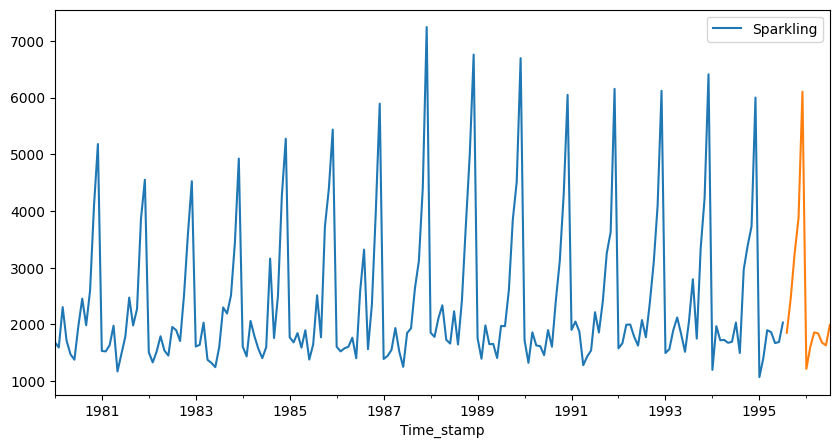

In [ ]:
df.plot();
prediction_1.plot();

* Triple exponential additive smoothing model prediction for 12 months which is from 1-Aug-1995 to 1-Jul-1996.
* Orange series denotes the forecasted values and blue series denotes the original series plotted against time stamp and sales of wines.


In [ ]:
pred_df_Add = pd.DataFrame({"lower_CI":prediction_1 - 1.96*np.std(fullmodel_TES_Add.resid,ddof=1),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*np.std(fullmodel_TES_Add.resid,ddof=1)})
pred_df_Add.head(12)

,lower_CI,prediction,upper_ci
1995-08-01,1127.564117,1851.014492,2574.464868
1995-09-01,1731.765943,2455.216319,3178.666694
1995-10-01,2522.446530,3245.896906,3969.347282
1995-11-01,3150.038540,3873.488915,4596.939291
1995-12-01,5379.093092,6102.543468,6825.993844
1996-01-01,492.050039,1215.500414,1938.950790
1996-02-01,876.987403,1600.437779,2323.888154
1996-03-01,1134.270243,1857.720618,2581.170994
1996-04-01,1116.687117,1840.137492,2563.587868
1996-05-01,955.073247,1678.523623,2401.973999


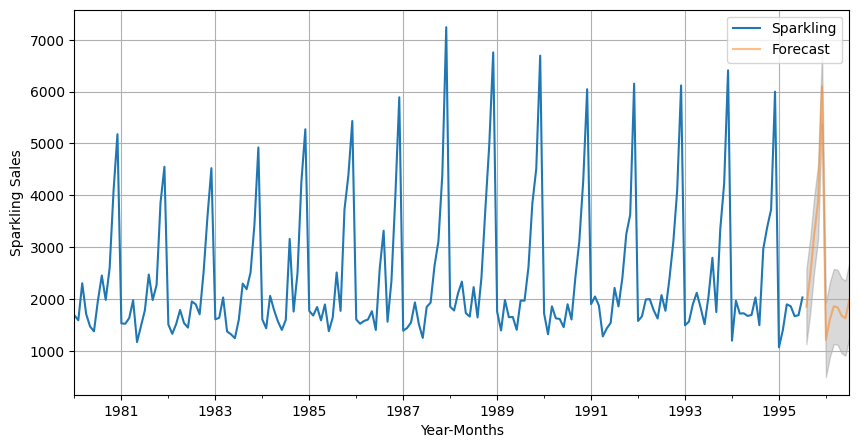

In [ ]:
axis = df.plot(label="Actual", figsize=(10,5))
pred_df_Add["prediction"].plot(ax=axis, label="Forecast", alpha=0.5)
axis.fill_between(pred_df_Add.index, pred_df_Add["lower_CI"], pred_df_Add["upper_ci"], color="k", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling Sales")
plt.legend(loc="best")
plt.grid()
plt.show()

* Forecasted series is similar to the original series and it is plotted with confidence intervals means the forecasted values is in range of confidence intervals.
* 2nd model for predicting the next 12 months of wine sales is the model with the second least RMSE value which is triple exponential smoothing model with multiplicative seasonality.
* The parameters are set into Exponential smoothing and the model is fitted into complete data.
* Using the model with fitted parameters and forecast into next 12 months.


#Prediction on Triple Exponential Multiplicative Smoothing

In [ ]:
fullmodel_TES_Mul= ExponentialSmoothing(df,
                                  trend="additive",
                                  seasonal="multiplicative").fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.049,
                                                                 smoothing_seasonal=0.362)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel_TES_mul =mean_squared_error(df["Sparkling"],fullmodel_TES_Mul.fittedvalues,squared=False)
RMSE_fullmodel_TES_mul

351.3659167846411

In [ ]:
prediction_2 = fullmodel_TES_Mul.forecast(steps=12)

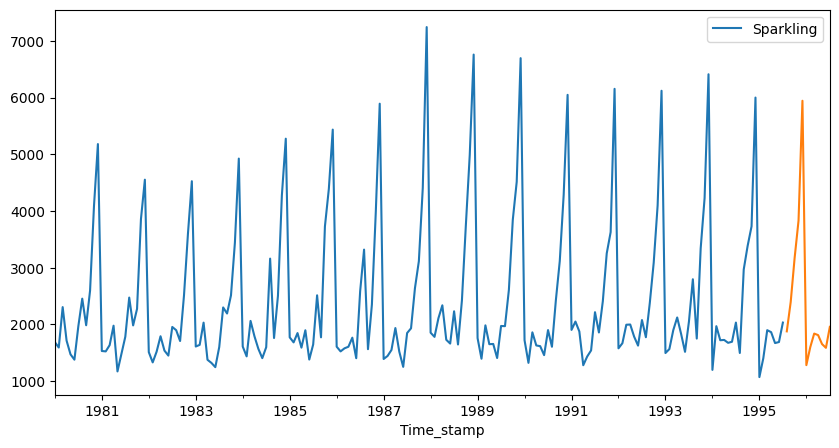

In [ ]:
df.plot();
prediction_2.plot();

Orange series denotes the forecasted values and blue series denotes the original series plotted against time stamp and sales of wines.

In [ ]:
pred_df_Mul = pd.DataFrame({"lower_CI":prediction_2 - 1.96*np.std(fullmodel_TES_Mul.resid,ddof=1),
                          "prediction":prediction_2,
                          "upper_ci": prediction_2 + 1.96*np.std(fullmodel_TES_Mul.resid,ddof=1)})
pred_df_Mul.head(12)

,lower_CI,prediction,upper_ci
1995-08-01,1185.607694,1876.084057,2566.560420
1995-09-01,1704.270988,2394.747351,3085.223714
1995-10-01,2479.171148,3169.647512,3860.123875
1995-11-01,3138.994947,3829.471310,4519.947673
1995-12-01,5252.242832,5942.719195,6633.195558
1996-01-01,590.285734,1280.762097,1971.238461
1996-02-01,907.762810,1598.239173,2288.715536
1996-03-01,1146.592407,1837.068770,2527.545134
1996-04-01,1119.751862,1810.228225,2500.704588
1996-05-01,962.157475,1652.633838,2343.110201


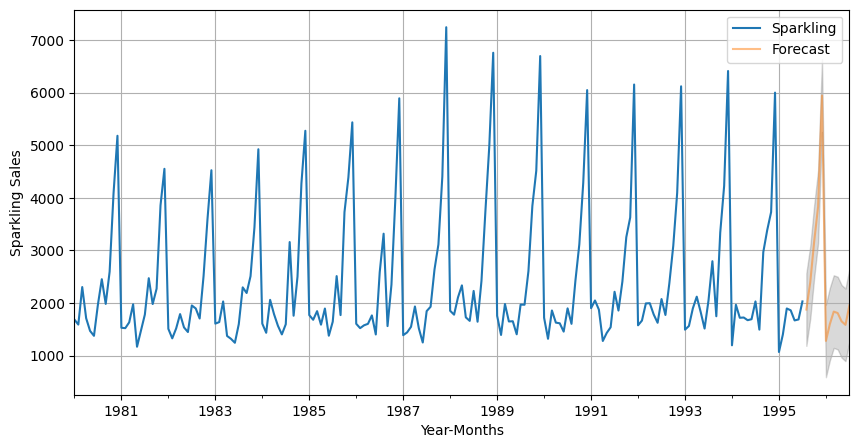

In [ ]:
axis = df.plot(label="Actual", figsize=(10,5))
pred_df_Mul["prediction"].plot(ax=axis, label="Forecast", alpha=0.5)
axis.fill_between(pred_df_Mul.index, pred_df_Mul["lower_CI"], pred_df_Mul["upper_ci"], color="k", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling Sales")
plt.legend(loc="best")
plt.grid()
plt.show()

* The forecasted series is similar to the original series and it is plotted with confidence intervals means the forecasted values are in range of confidence intervals.
* 3rd model for predicting the next 12 months of wine sales is the model with the third least RMSE value which is SARIMA model with (1, 1, 2) (2, 0, 2, 6).
* The parameters are set into SARIMA model.
* Using the model with fitted parameters and forecast into next 12 months.



#SARIMA Model

In [ ]:
full_data_SARIMA = sm.tsa.statespace.SARIMAX(df["Sparkling"],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_SARIMA = full_data_SARIMA.fit(maxiter=1000)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


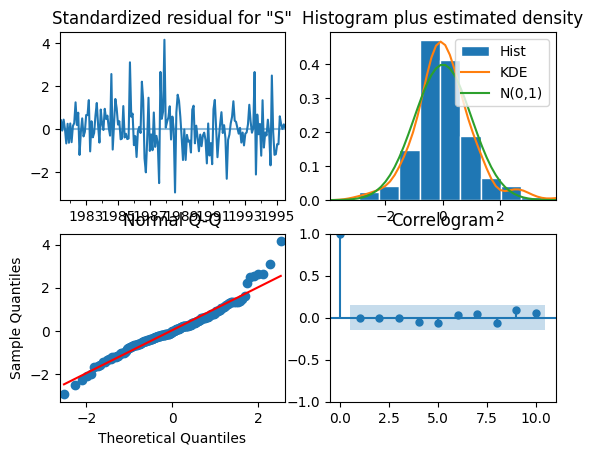

In [ ]:
results_full_SARIMA.plot_diagnostics();

From the above diagnostics plot we can see that distribution is almost normal from histogram and from Q-Q plot we can see that the most of the values are on the line.

In [ ]:
predicted_SARIMA = results_full_SARIMA.get_forecast(steps=12)

In [ ]:
predicted_SARIMA.summary_frame(alpha=0.05).head(12)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1858.898355,371.556461,1130.661073,2587.135638
1995-09-01,2383.661239,377.561773,1643.653763,3123.668716
1995-10-01,3280.243802,377.594691,2540.171807,4020.315798
1995-11-01,4021.078288,379.788695,3276.706124,4765.450452
1995-12-01,6291.727170,380.323371,5546.307062,7037.147279
1996-01-01,1217.745741,381.669838,469.686604,1965.804878
1996-02-01,1541.587585,381.717264,793.435495,2289.739675
1996-03-01,1768.561411,382.579550,1018.719272,2518.403550
1996-04-01,1774.826341,383.503265,1023.173754,2526.478928
1996-05-01,1666.182322,384.388107,912.795475,2419.569169


In [ ]:
rmse_full_SARIMA = mean_squared_error(df["Sparkling"],results_full_SARIMA.fittedvalues,squared=False)
rmse_full_SARIMA

532.9119073537844

In [ ]:
pred_SARIMA_date = predicted_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start="1995-08-01",end="1996-07-01", freq="MS"))

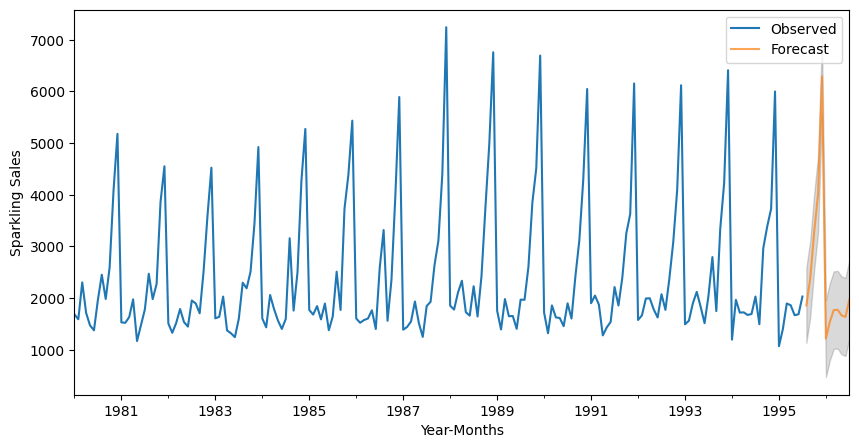

In [ ]:
axis = df["Sparkling"].plot(label="Observed")
pred_SARIMA_date["mean"].plot(ax=axis, label="Forecast", alpha=0.7)
axis.fill_between(pred_SARIMA_date.index, pred_SARIMA_date["mean_ci_lower"],
                  pred_SARIMA_date["mean_ci_upper"], color="k", alpha=.15)
axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling Sales")
plt.legend(loc="best")
plt.show()

From the above we can see that the forecasted series is similar to the original series and it is plotted with confidence intervals means the forecasted values are in range of confidence intervals.

#Recommendations:
* After building various models for sparkling wines sales data, the performance of Triple exponential smoothing gives the least RMSE value which is the method used for measuring performance.
* Least RMSE means the least errors in the model and the forecasted values follow the trend and seasonality of the original data.
* After building model on the complete data, we see that the RMSE value for Triple Exponential Smoothing model with multiplicative seasonality has least RMSE value. Whereas for the model build on training set and forecasted into test set, the least RMSE value is for Triple Exponential Smoothing model with additive seasonality.
* The best model for forecasting the values into the future is Triple Exponential Smoothing with multiplicative seasonality followed by Exponential Smoothing with additive seasonality and SARIMA model.
* From the analysis from the data, we can see the most sales are in the last months of the year.
* Company need to analyse the reason for the decrease in the sales of sparkling wine in the start of the year.
* In the yearly sales data, there is a fluctuation of sales, company needs to assess the reason for this fluctuation is it related to price of the wine or the brand value or the advertisement of the specific brand.
* If it’s related to advertisement, company needs to advertise more.
